# Dive Into DL Pytorch

In [2]:
import numpy as np
import torch

## Chapter 2 --- Prerequired knowledge

### Section 2 --- AutoGrad

In [14]:
x = torch.ones(2, 2, requires_grad=True)
print(x)
print(x.grad_fn)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
None


In [15]:
y = x + 2
print(y)
print(y.grad_fn)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [16]:
z = y * y * 3
out = z.mean()
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [17]:
out.backward()

In [18]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


## Chapter 3 --- Basics

### Section 1 --- Linear Model

In [38]:
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using cuda device


In [58]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.tensor(np.random.normal(0, 1, (num_examples, num_inputs)), dtype=torch.float)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

print(features[0], labels[0])

tensor([ 0.2435, -0.7149]) tensor(7.1030)


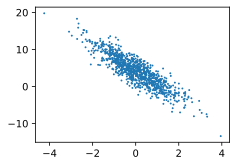

In [59]:
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

In [26]:
import torch.utils.data as Data

batch_size = 10

dataset = Data.TensorDataset(features, labels)

data_iter = Data.DataLoader(dataset, batch_size, shuffle=True)

In [60]:
from torch import nn
from torch import optim

class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_feature, 1)

    def forward(self, x):
        y = self.linear(x)
        return y


In [67]:
net = LinearNet(num_inputs).to("cuda")
print(net)

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [68]:
loss = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [95]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y.view(-1,1))

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 10 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [64]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [96]:
num_epochs = 3
for epoch in range(1, num_epochs + 1):
    train(data_iter, net, loss, optimizer)

loss: 0.000132  [    0/ 1000]
loss: 0.000119  [  100/ 1000]
loss: 0.000160  [  200/ 1000]
loss: 0.000113  [  300/ 1000]
loss: 0.000222  [  400/ 1000]
loss: 0.000067  [  500/ 1000]
loss: 0.000055  [  600/ 1000]
loss: 0.000239  [  700/ 1000]
loss: 0.000079  [  800/ 1000]
loss: 0.000052  [  900/ 1000]
loss: 0.000111  [    0/ 1000]
loss: 0.000103  [  100/ 1000]
loss: 0.000149  [  200/ 1000]
loss: 0.000132  [  300/ 1000]
loss: 0.000077  [  400/ 1000]
loss: 0.000118  [  500/ 1000]
loss: 0.000074  [  600/ 1000]
loss: 0.000118  [  700/ 1000]
loss: 0.000055  [  800/ 1000]
loss: 0.000085  [  900/ 1000]
loss: 0.000141  [    0/ 1000]
loss: 0.000052  [  100/ 1000]
loss: 0.000064  [  200/ 1000]
loss: 0.000063  [  300/ 1000]
loss: 0.000172  [  400/ 1000]
loss: 0.000172  [  500/ 1000]
loss: 0.000131  [  600/ 1000]
loss: 0.000044  [  700/ 1000]
loss: 0.000104  [  800/ 1000]
loss: 0.000087  [  900/ 1000]


In [97]:
net.state_dict()

OrderedDict([('linear.weight', tensor([[ 2.0004, -3.4002]], device='cuda:0')),
             ('linear.bias', tensor([4.2000], device='cuda:0'))])